# Bandits

This notebook will:
- Help you create your first bandit algorithm
- Help you understand the effect of epsilon on exploration and learn about the exploration/exploitation tradeoff

This class uses RL-Glue to implement most of our experiments. It was software orginally designed by Dr. Adam White during his MSc. This library will give you solid framework both for understanding how reinforcement learning experiments work and for being able to run your own. If it feels a little confusing at first don't worry - we are going to walk you through it slowly and introduce you to more and more pieces of it as the modules and courses go on.

We are assuming that you have used an Jupyter notebook before. But if not it is quite simple, simply press the run button, or shift+enter, to run each of the cells. The places in the code that you will need to fill in will be clearly marked for you.

In [1]:
# Import necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from rl_glue import RLGlue
import main_agent
import ten_arm_env
import test_env
from tqdm import tqdm
import time
from utils import argmax

Above we import the libraries we need for for this assignment. We use numpy throughout the course and we will occasionally provide hints for different parts of numpy to look at using. Other than that we will use mostly vanilla python and the occasional other library, such as matplotlib for making plots.

You will notice that we import ten_arm_env. This is the __10-armed Testbed__ introduced in section 2.3 of the textbook. We will use this throughout this notebook to test our bandit agents. It has 10 arms each with expected values selected at the start of each run from a normal distribution. Each time an arm its reward is returned from a normal distribution with the mean selected originally. If you are unfamiliar with the 10-armed Testbed please review it in the textbook before continuing.

DO NOT IMPORT OTHER LIBRARIES as this will break the autograder.

## 1.1 Epsilon Greedy Agent

Now we introduce the first part of an RL-Glue agent that you will implement. We will slowly introduce more parts of RL-Glue throughout this assignment, and throughout the course. Here we are going to create a GreedyAgent and implement the agent_step method. This is the main method that is going to get called throughout the life of the agent. Each time the agent takes a step this method gets called, and we typically will have to select an action for the agent, and update the agent value function based on the signals it gets from the environment.

Fill in the code below to implement a greedy agent.

We learned about another way to do this in class where we don't always take the greedy action - sometimes we take an exploratory action. We do this so that the agent can do a better job of finding out what the best action really is. If we always choose what we think the current best action is, we may be missing out on the true best action because we haven't explored enough times to find out.

Implement an epsilon greedy agent below. Hint: we are impementing the algorithm from section 2.4 of the textbook. You may want to look at [np.random.random](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.random.html) to help you decide when to take an epsilon action and use your greedy code from above.

In [2]:
# Epsilon Greedy Agent here [Graded]
# Greedy agent here
class EpsilonGreedyAgent(main_agent.Agent):
    def agent_step(self, reward, observation):
        """
        Takes one step for the agent. It takes in a reward and observation and 
        returns the action the agent chooses at that time step.
        
        Arguments:
        reward -- float, the reward the agent recieved from the environment after taking the last action.
        observation -- float, the observed state the agent is in. Do not worry about this as you will not use it
                              until future lessons
        Returns:
        current_action -- int, the action chosen by the agent at the current time step.
        """
        
        ### Useful Class Variables ###
        # self.q_values : An array with what the agent believes each of the values of the arm are.
        # self.arm_count : An array with a count of the number of times each arm has been pulled.
        # self.last_action : The action that the agent took on the previous time step
        #######################
        
        # Choose action using epsilon greedy
        ### START CODE HERE ### (~4 lines)
        if np.random.random() < self.epsilon:
            current_action = None# Randomly choose an arm
        else:
            current_action = None # Use the imported argmax function to choose the current best arm
        ### END CODE HERE ###
        
        # Update Q values
        ### START CODE HERE ### (~2-3 lines)
        self.q_values[self.last_action] += self.step_size * (reward - self.q_values[self.last_action])
        ### END CODE HERE ###
        
        self.last_action = current_action
        
        return current_action

Now that we have our epsilon greedy agent created let's try a few different values for epsilon and see how they perform. This is a fairly common thing to do in reinforcement learning - to try different variables to see which performs best. We do this both to get an understanding of how the agent performs with different parameter settings, and to try to find the best parameters to use when comparing agents.

Let's visualize the result. Here we run an experiment using RLGlue to text out our agent. Don't worry too much about the experiment code for now. In future lessons we will walk more through running experiments so that you can create your own, but for now we will set this part up for you.

Below: create an array of epsilons for us to sweep over.

100%|██████████| 200/200 [00:03<00:00, 54.64it/s]


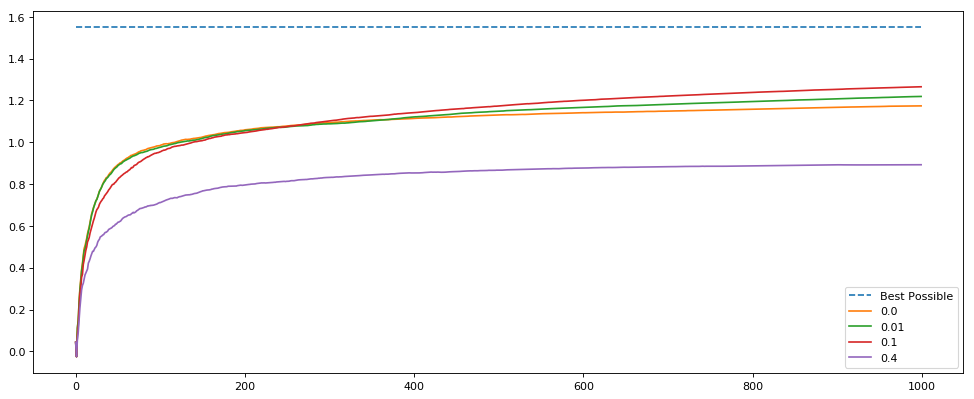

In [8]:
# Experiment code for different e-greedy [graded]
### START CODE HERE ### (~4 lines)
epsilons = [] # change to an array with values 0.0, 0.01, 0.1, 0.4
### END CODE HERE ###

num_runs = 200                    # The number of times we run the experiment
num_steps = 1000                  # The number of pulls of each arm the agent takes
env = ten_arm_env.Environment     # We set what environment we want to use to test
agent = EpsilonGreedyAgent               # We choose what agent we want to use
agent_info = {"num_actions": 10}  # We pass the agent the information it needs. Here how many arms there are.
env_info = {}                     # We pass the environment the information it needs. In this case nothing.

plt.figure(figsize=(15, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot([1.55 for _ in range(num_steps)], linestyle="--")

n_q_values = []
n_averages = []
n_best_actions = []

for epsilon in epsilons:
    all_averages = []
    for run in tqdm(range(num_runs)):
        agent = EpsilonGreedyAgent
        agent_info = {"num_actions": 10, "epsilon": epsilon, "step_size": 0.1,}
        env_info = {"random_seed": run}

        rl_glue = RLGlue(env, agent)
        rl_glue.rl_init(agent_info, env_info)
        rl_glue.rl_start()
        
        best_arm = np.argmax(rl_glue.environment.arms)

        scores = [0]
        averages = []
        best_action_chosen = []
        
        for i in range(num_steps):
            reward, state, action, is_terminal = rl_glue.rl_step()
            scores.append(scores[-1] + reward)
            averages.append(scores[-1] / (i + 1))
            if action == best_arm:
                best_action_chosen.append(1)
            else:
                best_action_chosen.append(0)
            if epsilon == 0.1 and run == 0:
                n_q_values.append(np.copy(rl_glue.agent.q_values))
        if epsilon == 0.1:
            n_averages.append(averages)
            n_best_actions.append(best_action_chosen)
        all_averages.append(averages)
        
    plt.plot(np.mean(all_averages, axis=0))
plt.legend(["Best Possible"] + epsilons)
plt.show()

Why did 0.1 perform better than 0.01?

If exploration helps why did 0.4 perform worse that 0.0 (the greedy agent)?

## 1.2 Averaging Multiple Runs

Did you notice that we averaged over 200 runs? Why did we do that?

To get some insight let's look at the results of two individual runs.

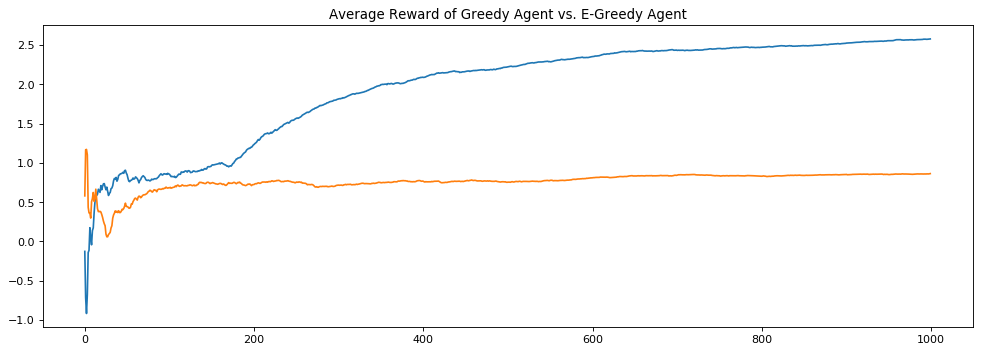

In [4]:
# Plot runs of e-greedy agent
agent = EpsilonGreedyAgent
agent_info = {"num_actions": 10, "epsilon": 0.1}
env_info = {}
all_averages = []
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
num_steps = 1000

for run in (0, 1):
    np.random.seed(run) # Here we set the seed so that we can compare two different runs
    averages = []
    rl_glue = RLGlue(env, agent)
    rl_glue.rl_init(agent_info, env_info)
    rl_glue.rl_start()

    scores = [0]
    for i in range(num_steps):
        reward, state, action, is_terminal = rl_glue.rl_step()
        scores.append(scores[-1] + reward)
        averages.append(scores[-1] / (i + 1))
#     all_averages.append(averages)
    plt.plot(averages)

# plt.plot(greedy_scores)
plt.title("Average Reward of Greedy Agent vs. E-Greedy Agent")
# plt.plot(np.mean(all_averages, axis=0))
# plt.legend(("Greedy", "Epsilon: 0.1"))
plt.show()

Notice how the two runs were different? If this is the exact same algorithm why does it give us two different runs? 

The answer is due to randomness. Depending on what action the agent randomly starts with, or when it randomly chooses to explore, it can change the results of the runs.

Lets take a look at how this can happen. We will set the random seed for two examples and see how many times we would get the exploratory action.

In [5]:
print("Random Seed 1")
np.random.seed(1)
for _ in range(15):
    if np.random.random() < 0.1:
        print("Exploratory Action")
    

print()
print()

print("Random Seed 2")
np.random.seed(2)
for _ in range(15):
    if np.random.random() < 0.1:
        print("Exploratory Action")

Random Seed 1
Exploratory Action
Exploratory Action
Exploratory Action


Random Seed 2
Exploratory Action


Notice how in the first one we take the exploratory action three times, but in the second one we only take the exploratory action once? This can have a lot of effect on our agent - for instance they may end up exploring more earlier and finding a better action to greedily exploit. Additionally the environment may be stochastic so we may just end up getting lucky on and ending up with more fortunate values early on. Either way we want to make sure that we remove the effect of this randomness when we are comparing algorithms.

In order to know for sure our results are valid we need to run them a number of times so that we can get how the algorithm will perform on average. This way when we are comparing different algorithms, or different parameter settings, we can more strongly know that one is better than the other.